In [368]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [369]:
import numpy as np

In [370]:
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [371]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [372]:
id ='1kdKJwZ66dL4wBYRQjQfRCqU57wMRF_Ri'
dowloaded = drive.CreateFile({"id": id})
dowloaded.GetContentFile('customer_airways_data.csv')

airways_data=pd.read_csv('customer_airways_data.csv', encoding='ISO-8859-1')
airways_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  int64  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  int64  
 4   length_of_stay         50000 non-null  int64  
 5   flight_hour            50000 non-null  int64  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  int64  
 10  wants_preferred_seat   50000 non-null  int64  
 11  wants_in_flight_meals  50000 non-null  int64  
 12  flight_duration        50000 non-null  float64
 13  booking_complete       50000 non-null  int64  
dtypes: float64(1), int64(8), object(5)
memory usage: 5.3+ 

In [373]:
airways_data["num_passengers"]= airways_data["num_passengers"].astype(np.uint8)
airways_data["purchase_lead"]= airways_data["purchase_lead"].astype(np.uint16)
airways_data["length_of_stay"]= airways_data["length_of_stay"].astype(np.uint16)
airways_data["flight_hour"]= airways_data["flight_hour"].astype(np.uint8)
airways_data["wants_extra_baggage"]= airways_data["wants_extra_baggage"].astype(np.uint8)
airways_data["wants_preferred_seat"]= airways_data["wants_preferred_seat"].astype(np.uint8)
airways_data["wants_in_flight_meals"]= airways_data["wants_in_flight_meals"].astype(np.uint8)
airways_data["flight_duration"]= airways_data["flight_duration"].astype(np.float32)
airways_data["booking_complete"]= airways_data["booking_complete"].astype(np.uint8)

In [374]:
airways_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   num_passengers         50000 non-null  uint8  
 1   sales_channel          50000 non-null  object 
 2   trip_type              50000 non-null  object 
 3   purchase_lead          50000 non-null  uint16 
 4   length_of_stay         50000 non-null  uint16 
 5   flight_hour            50000 non-null  uint8  
 6   flight_day             50000 non-null  object 
 7   route                  50000 non-null  object 
 8   booking_origin         50000 non-null  object 
 9   wants_extra_baggage    50000 non-null  uint8  
 10  wants_preferred_seat   50000 non-null  uint8  
 11  wants_in_flight_meals  50000 non-null  uint8  
 12  flight_duration        50000 non-null  float32
 13  booking_complete       50000 non-null  uint8  
dtypes: float32(1), object(5), uint16(2), uint8(6)
memory u

In [375]:
airways_data

,num_passengers,sales_channel,trip_type,purchase_lead,length_of_stay,flight_hour,flight_day,route,booking_origin,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
0,2,Internet,RoundTrip,262,19,7,Sat,AKLDEL,New Zealand,1,0,0,5.52,0
1,1,Internet,RoundTrip,112,20,3,Sat,AKLDEL,New Zealand,0,0,0,5.52,0
2,2,Internet,RoundTrip,243,22,17,Wed,AKLDEL,India,1,1,0,5.52,0
3,1,Internet,RoundTrip,96,31,4,Sat,AKLDEL,New Zealand,0,0,1,5.52,0
4,2,Internet,RoundTrip,68,22,15,Wed,AKLDEL,India,1,0,1,5.52,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,2,Internet,RoundTrip,27,6,9,Sat,PERPNH,Australia,1,0,1,5.62,0
49996,1,Internet,RoundTrip,111,6,4,Sun,PERPNH,Australia,0,0,0,5.62,0
49997,1,Internet,RoundTrip,24,6,22,Sat,PERPNH,Australia,0,0,1,5.62,0
49998,1,Internet,RoundTrip,15,6,11,Mon,PERPNH,Australia,1,0,1,5.62,0


In [376]:
id ='1JmUx0ZUXUpIffTIYiuWvxpaM0Yc-dfxe'
dowloaded = drive.CreateFile({"id": id})
dowloaded.GetContentFile('cleaned-reviews.csv')

cleaned_reviews=pd.read_csv('cleaned-reviews.csv', encoding='ISO-8859-1')
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  3411 non-null   int64 
 1   reviews     3411 non-null   object
 2   rates       3411 non-null   int64 
 3   date        3411 non-null   object
 4   country     3411 non-null   object
 5   verified    3411 non-null   bool  
 6   comments    3411 non-null   object
dtypes: bool(1), int64(2), object(4)
memory usage: 163.3+ KB


In [377]:
cleaned_reviews["rates"]= cleaned_reviews["rates"].astype(np.uint8)
cleaned_reviews["date"]= pd.to_datetime(cleaned_reviews["date"])

Se elimina la columna Unnamed ya que si su función es la de ser un indice, estaba contando mal

In [378]:
cleaned_reviews.drop(cleaned_reviews.columns[0], axis=1, inplace=True)
cleaned_reviews.reset_index()

,index,reviews,rates,date,country,verified,comments
0,0,â Trip Verified | Excellent service both on ...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,1,â Trip Verified | Good lounge at Cape Town....,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,2,â Trip Verified | A really excellent journe...,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,3,â Trip Verified | This flight was one of th...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...,...
3406,3406,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,3407,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,3408,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,3409,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


In [379]:
cleaned_reviews

,reviews,rates,date,country,verified,comments
0,â Trip Verified | Excellent service both on ...,5,2023-01-24,United Kingdom,True,excellent service ground board first class pro...
1,â Trip Verified | Good lounge at Cape Town....,9,2023-01-24,United Kingdom,True,good lounge cape town time departure drink hig...
2,â Trip Verified | A really excellent journe...,9,2023-01-23,United Kingdom,True,really excellent journey lounge overcrowded la...
3,â Trip Verified | This flight was one of th...,9,2023-01-21,United Kingdom,True,flight one worst ever life wanted pamper bough...
4,Not Verified | It seems that there is a race t...,2,2023-01-19,United States,False,verified seems race bottom amongst airline can...
...,...,...,...,...,...,...
3406,Flew British Airways from Sydney to Venice on ...,10,2014-05-20,Australia,False,flew british airway sydney venice nd april ret...
3407,Recently for our honeymoon we took advantage o...,1,2014-05-19,United Kingdom,False,recently honeymoon took advantage ba promo fly...
3408,LGW-Antigua on 29 April and Antigua-LGW on 13 ...,4,2014-05-18,United Kingdom,False,lgw antigua april antigua lgw may boeing start...
3409,LHR-JTR-LHR. A tale of opposites for BA's new ...,2,2014-05-18,United Kingdom,False,lhr jtr lhr tale opposite ba new route santori...


In [380]:
cleaned_reviews.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3411 entries, 0 to 3410
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   reviews   3411 non-null   object        
 1   rates     3411 non-null   uint8         
 2   date      3411 non-null   datetime64[ns]
 3   country   3411 non-null   object        
 4   verified  3411 non-null   bool          
 5   comments  3411 non-null   object        
dtypes: bool(1), datetime64[ns](1), object(3), uint8(1)
memory usage: 113.4+ KB


Buscando Outliers en airways_data




In [381]:
col_numericas = []
tipos_numericos = [np.float32, np.uint8, np.uint16, np.int64]
for columna in airways_data.columns:
  if (airways_data[columna].dtype in tipos_numericos):
    col_numericas.append(columna);

In [382]:
airways_data[col_numericas].describe()

,num_passengers,purchase_lead,length_of_stay,flight_hour,wants_extra_baggage,wants_preferred_seat,wants_in_flight_meals,flight_duration,booking_complete
count,50000.000000,50000.000000,50000.00000,50000.00000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,1.591240,84.940480,23.04456,9.06634,0.668780,0.296960,0.427140,7.277561,0.149560
std,1.020165,90.451378,33.88767,5.41266,0.470657,0.456923,0.494668,1.496863,0.356643
min,1.000000,0.000000,0.00000,0.00000,0.000000,0.000000,0.000000,4.670000,0.000000
25%,1.000000,21.000000,5.00000,5.00000,0.000000,0.000000,0.000000,5.620000,0.000000
50%,1.000000,51.000000,17.00000,9.00000,1.000000,0.000000,0.000000,7.570000,0.000000
75%,2.000000,115.000000,28.00000,13.00000,1.000000,1.000000,1.000000,8.830000,0.000000
max,9.000000,867.000000,778.00000,23.00000,1.000000,1.000000,1.000000,9.500000,1.000000


Text(0.5, 1.0, 'Distribucion de la cantidad de pasajeros en los vuelos')

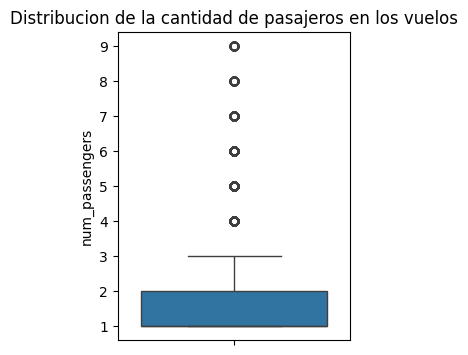

In [383]:
plt.figure(figsize=(3,4))
graf=sns.boxplot(data=airways_data['num_passengers'])
plt.title('Distribucion de la cantidad de pasajeros en los vuelos')

Text(0.5, 1.0, 'Distribucion de la cantidad de dias entre la reserva y el viaje')

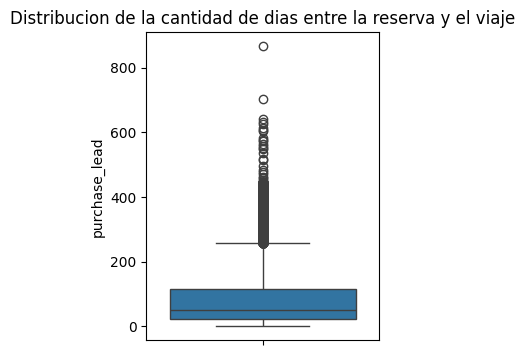

In [384]:
plt.figure(figsize=(3,4))
graf=sns.boxplot(data=airways_data['purchase_lead'])
plt.title('Distribucion de la cantidad de dias entre la reserva y el viaje')

Text(0.5, 1.0, 'Distribucion de la cantidad de dias de estadia en el destino')

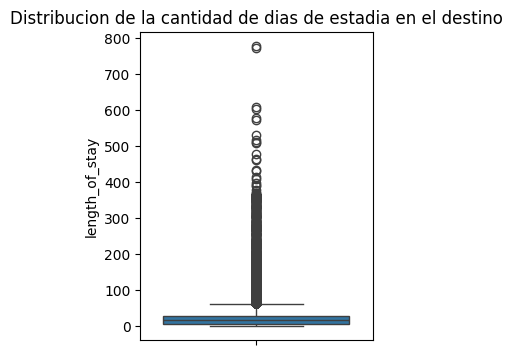

In [385]:
plt.figure(figsize=(3,4))
graf=sns.boxplot(data=airways_data['length_of_stay'])
plt.title('Distribucion de la cantidad de dias de estadia en el destino')

Text(0.5, 1.0, 'Distribucion de la duracion del vuelo')

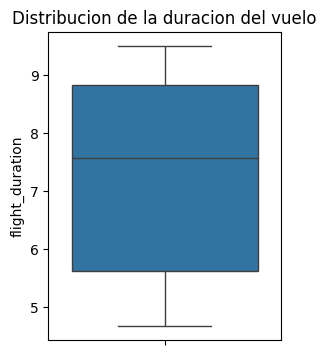

In [386]:
plt.figure(figsize=(3,4))
graf=sns.boxplot(data=airways_data['flight_duration'])
plt.title('Distribucion de la duracion del vuelo')

FALTARIA ANALIZAR SI QUITAR O NO ESOS OUTLIERS BAJO ALGUN CRITERIO

**Algunas Metricas**

1) Distribucion de vuelos según el dia de la semana

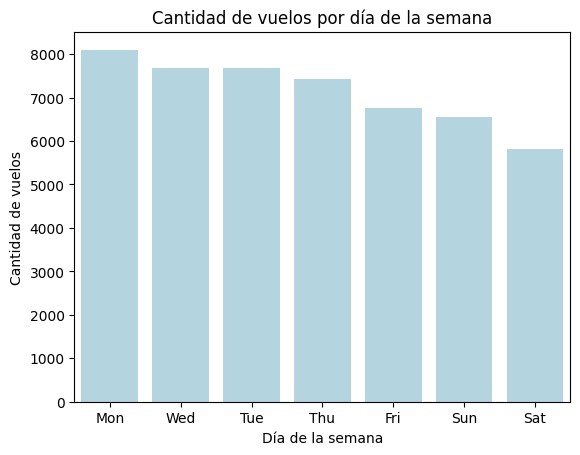

In [387]:
vuelos_por_dia = airways_data['flight_day'].value_counts()

sns.barplot(x=vuelos_por_dia.index, y=vuelos_por_dia.values, color='lightblue')

plt.xlabel('Día de la semana')
plt.ylabel('Cantidad de vuelos')
plt.title('Cantidad de vuelos por día de la semana')

plt.show()

Donde se ve que Martes/Miercoles y Sabado/Domingo estan invertidos tomando en cuenta el orden natural de los dias de la semana